**Круговая диаграмма** — это способ представления данных в виде круга, разделённого на сектора. Каждый сектор — это категория данных,
которая составляет долю от общей суммы. Главная цель круговой диаграммы — показать, из чего состоит круг, то есть какие доли внутри
единого целого занимают отдельные элементы. Поэтому сумма значений всех секторов должна составлять 100%.

**Установка необходимых библиотек**

In [ ]:
pip install pandas matplotlib seaborn plotly nbformat


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Подготовка данных**

In [ ]:
import pandas as pd


file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
data = pd.read_csv(file_path)

# Проверка первых нескольких строк данных
data.head()

,Date,Apple,Samsung,Xiaomi,Other
0,2024-06,27.16,23.72,11.92,37.20
1,2024-07,27.75,23.56,11.80,36.89
2,2024-08,27.71,23.58,12.13,36.58
3,2024-09,27.61,22.90,11.80,37.69
4,2024-10,28.38,22.82,10.62,38.18


1. Построение круговой диаграммы с использованием библиотеки **Matplotlib**

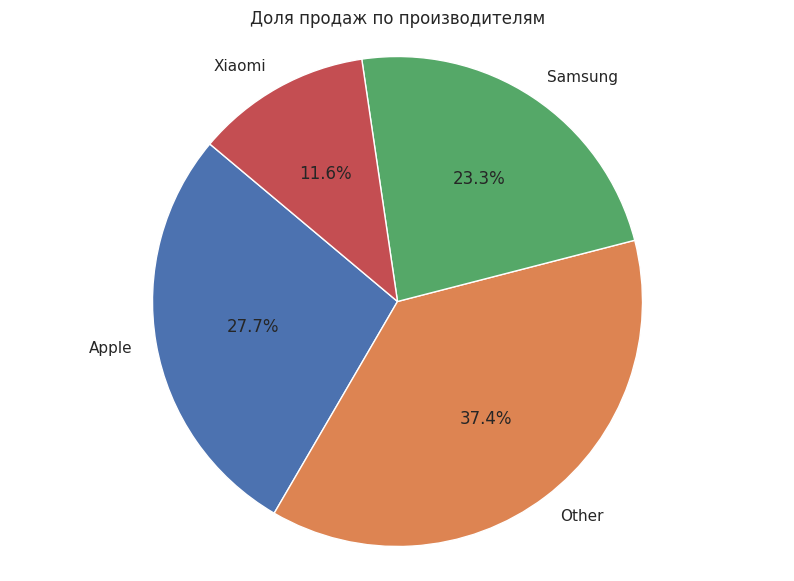

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
data = pd.read_csv(file_path)

# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Установка 'Date' в качестве индекса
data.set_index('Date', inplace=True)

# Группировка данных по месяцу и суммирование значений
monthly_data = data.resample('ME').sum().reset_index()

# Преобразование данных в длинный формат для анализа
monthly_data_melted = monthly_data.melt(id_vars='Date', var_name='Vendor', value_name='Sales')

# Суммирование продаж по производителям
vendor_sales = monthly_data_melted.groupby('Vendor')['Sales'].sum()

# Построение круговой диаграммы
plt.figure(figsize=(10, 7))
plt.pie(vendor_sales, labels=vendor_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Доля продаж по производителям')
plt.axis('equal')  # Чтобы круговая диаграмма выглядела как круг

# Отображение графика
plt.show()


2. Построение круговой диаграммы с использованием библиотеки **Seaborn**

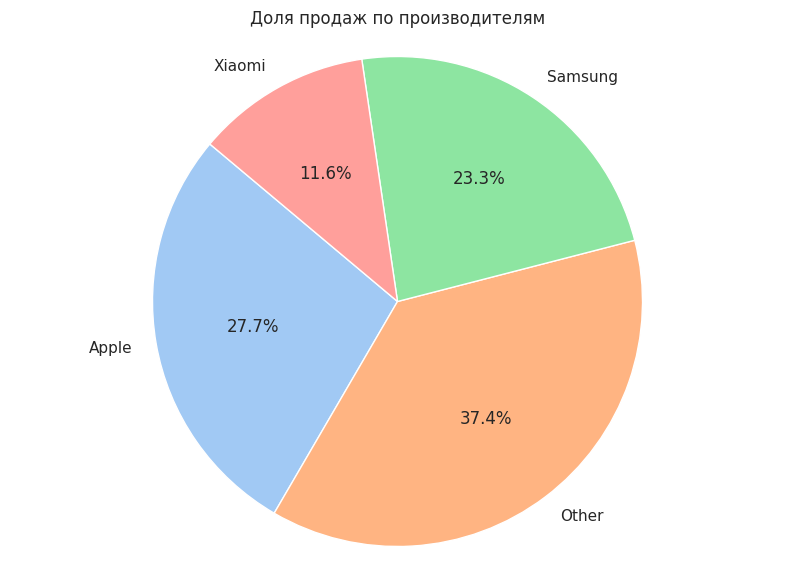

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
data = pd.read_csv(file_path)

# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Установка 'Date' в качестве индекса
data.set_index('Date', inplace=True)

# Группировка данных по месяцу и суммирование значений
monthly_data = data.resample('ME').sum().reset_index()

# Преобразование данных в длинный формат для анализа
monthly_data_melted = monthly_data.melt(id_vars='Date', var_name='Vendor', value_name='Sales')

# Суммирование продаж по производителям
vendor_sales = monthly_data_melted.groupby('Vendor')['Sales'].sum()

# Настройка стиля Seaborn
sns.set(style="whitegrid")

# Построение круговой диаграммы
plt.figure(figsize=(10, 7))
plt.pie(vendor_sales, labels=vendor_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Доля продаж по производителям')
plt.axis('equal')  # Чтобы круговая диаграмма выглядела как круг

# Отображение графика
plt.show()


3. Построение круговой диаграммы с использованием библиотеки **Plotly**

In [7]:
import pandas as pd
import plotly.express as px

# Загрузка данных из CSV файла
file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
data = pd.read_csv(file_path)

# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Установка 'Date' в качестве индекса
data.set_index('Date', inplace=True)

# Группировка данных по месяцу и суммирование значений
monthly_data = data.resample('ME').sum().reset_index()

# Преобразование данных в длинный формат для анализа
monthly_data_melted = monthly_data.melt(id_vars='Date', var_name='Производитель', value_name='Продажи')

# Суммирование продаж по производителям
vendor_sales = monthly_data_melted.groupby('Производитель')['Продажи'].sum().reset_index()

# Построение круговой диаграммы с помощью Plotly
fig = px.pie(vendor_sales, values='Продажи', names='Производитель', title='Доля продаж по производителям')

# Отображение графика
fig.show()
